In [11]:
from mpmath import zeta
import numpy as np 
import sympy
import matplotlib.pyplot as plt 
import pyprimes
import seaborn as sns

In [119]:
# Developed Libraries
from Zeta_Algorithms import zetaStochastic, zetaNormRange

ImportError: cannot import name 'zetaNormRange' from 'Zeta_Algorithms' (C:\Users\mahar\OneDrive\Documents\GitHub\Random_Zeta\Zeta_Algorithms.py)

In [3]:
# <img src="zeta_critical_line.jpg" width="600" height="600">

**The Riemann Zeta function is defined as:**
$$\zeta(s):=\sum_{n=1}^\infty{n^{-s}} \ \ \ \ : \ (s=\sigma + it) \ \ ; \ (\sigma > 1)$$

Our Zeta Stochastic Function is defined $(\ X_T(h),\  h\in I)$, this follows as 
$$X_T(h) = \sum_{p\leq T}\cdot \frac{1}{\sqrt{p}}Re(p^{ih}e^{i\theta_p})$$
Where $p$ refers to the primes, $Re$ is concerned witht the 'real' part of the expression $p^{ih}e^{i\theta_p}$ and $\theta_p \sim U(0,2\pi) \ IID$

Through... we have the following
$$X_T(h) = \sum_{p\leq T}\cdot \frac{1}{\sqrt{p}}cos(\theta_p - hlog(p))$$

In [4]:
# Stores prime list up to 10^8
# This minimizes runtime by limiting the creation of the prime list 
prime_num = list(pyprimes.primes_below(1e8))

In [7]:
T_val = int(1e6)

# create range interval of h from -1 to 1
x=np.arange(-1,1,1/100)

# create stochastic zeta range over h interval  
sims = 100
y = np.array([[zetaStochastic(h=i, T=T_val, prime_list=prime_num) for i in x] for _ in range(sims)]).reshape(sims, 200)

In [8]:
y

array([[-0.5627564 , -0.22899247, -0.77713163, ..., -1.68462287,
         2.1399851 ,  1.75309871],
       [-1.2621083 ,  1.17097488, -1.69496098, ...,  0.38619871,
         0.51119982,  0.58008828],
       [-1.39794727,  0.26091429, -0.32422856, ..., -1.24518133,
         0.14143937, -1.74496477],
       ...,
       [ 0.0771411 ,  0.62299356,  1.49265527, ...,  0.71807942,
        -0.33180828,  0.66511852],
       [-0.43847374,  0.55483074,  0.78875145, ...,  2.09395899,
         2.00269427, -0.86644646],
       [ 0.86153832,  1.83676152,  1.71066805, ...,  0.7627276 ,
         1.21486062, -0.76422672]])

In [116]:
# rolling maximum of norm function
maximum = [y[:, :i+1].max() for i in range(y.shape[1])]

# rolling minimum of norm function
minimum = [y[:, :i+1].min() for i in range(y.shape[1])]

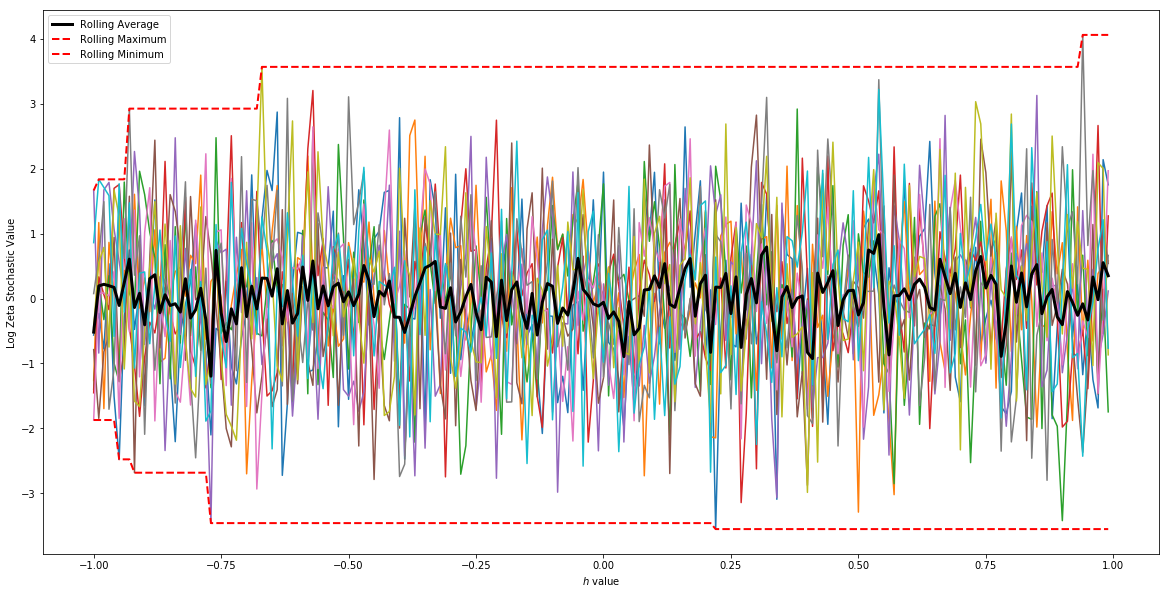

In [118]:
plt.figure(figsize=(20,10))  
for i in range(10):
    plt.plot(x, y[i])
plt.plot(x, np.average(y, axis=0), lw=3, color='black', label='Rolling Average')
plt.plot(x, maximum, lw=2, color='red', ls='--', label='Rolling Maximum')
plt.plot(x, minimum, lw=2, color='red', ls='--', label='Rolling Minimum')


plt.ylabel('Log Zeta Stochastic Value')
plt.xlabel('$h$ value')
plt.legend()
plt.show()

**Computations of the Riemann Zeta function on the critical line refer to computations of the form $\zeta(\frac{1}{2} + it)$, where we move vertically along the complex plane with $t$, while being fixed at the point $\frac{1}{2}$ on the real number line. We will be using an existing implementation of the Zeta function in Python, defined in the documentation provided, http://mpmath.org/doc/current/functions/zeta.html?highlight=zeta#mpmath.zeta** 



In [55]:
N = 0   # starting value of T range 
deltaN = 500    # length of T range

In [56]:
# creating the interval range t
t_range=np.arange(N, N+deltaN)

In [57]:
# storage for the normal zeta 
norm_zeta_value = zetaNormRange(N, deltaN)

# rolling average of norm function 
average = np.cumsum(norm_zeta_value)/(t_range+1)

# rolling maximum of norm function
maximum = [norm_zeta_value[:i+1].max() for i in range(norm_zeta_value.size)]

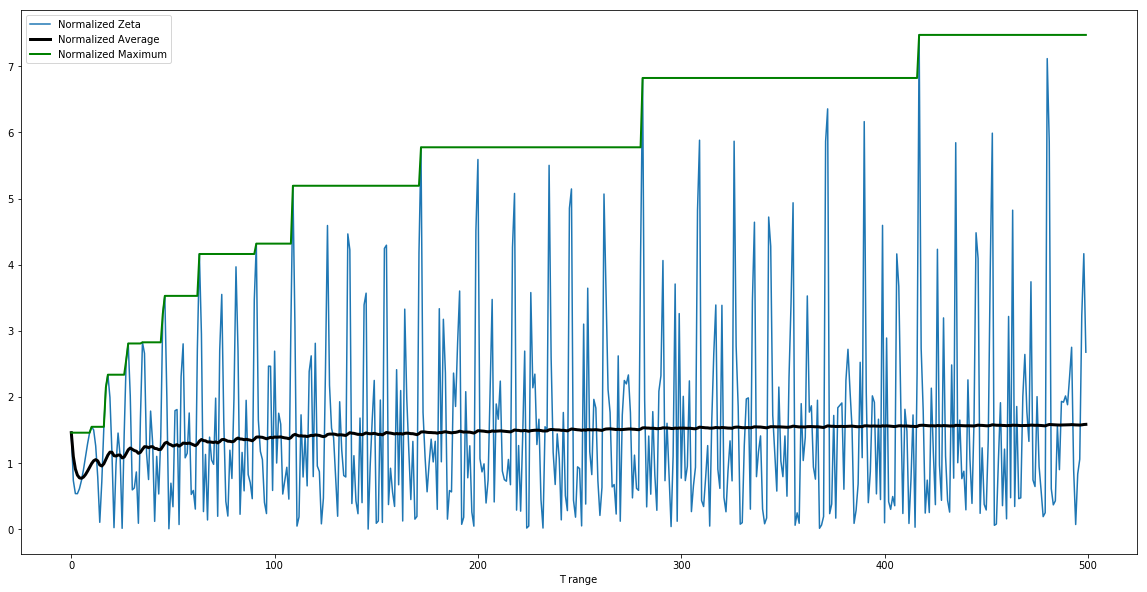

In [58]:
plt.figure(figsize=(20,10))  
plt.plot(t_range, norm_zeta_value, label='Normalized Zeta')
plt.plot(t_range, average, label='Normalized Average', lw=3, color='black')
plt.plot(t_range, maximum, label='Normalized Maximum', lw=2, color='green')
plt.xlabel('T range')
plt.legend()
plt.show()

C:\Users\mahar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


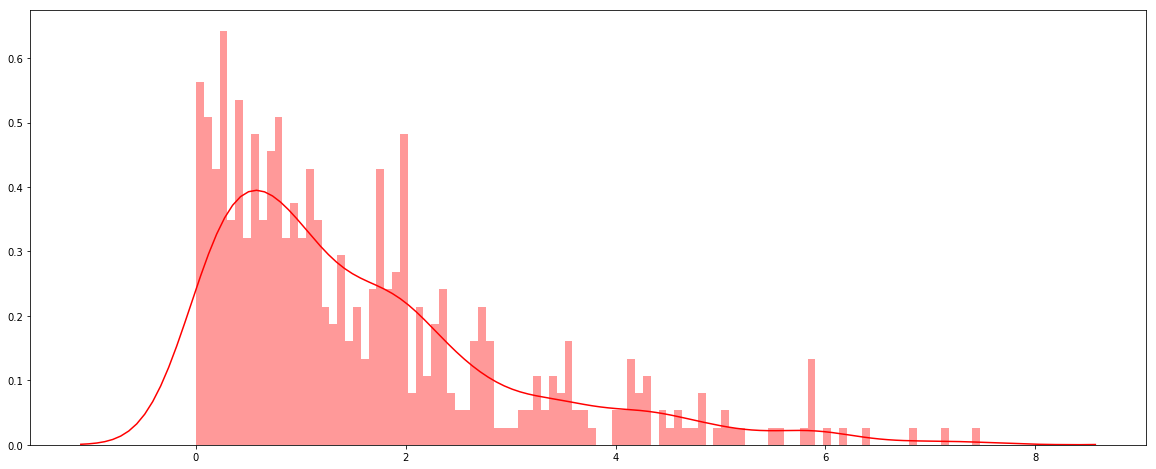

In [106]:
plt.figure(figsize=(20,8))
# deprecation error is an issue with displot implementation within Seaborn
sns.distplot(norm_zeta_value, bins=100, color='red')
plt.show()